In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random as rand

In [12]:
# Now, we want to solve 2 coupled SDEs of the form 
# dX1 = a1(X1,X2,t) dt + b(X1,X2,t) dB_t and dX2 = a2(X1,X2,t) dt + b(X1,X2,t) dB_t
# Below we define an example of such a SDE
D = 1
beta = 0.1
def a1(x1,x2,t):
    a = beta*x1 + x2
    b = x1*x1 + x2*x2
    return a*(1-b)
def a2(x1,x2,t):
    a = beta*x2 - x1
    b = x1*x1 + x2*x2
    return a*(1-b)
def b(x1,x2,t):
    return np.sqrt(2*D)

In [13]:
# Implement a Box-Muller Transform
# See https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform
# for the background theory.
def normal(m,s2):
    u1 = rand.random()
    u2 = rand.random()
    
    z0 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z1 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)

    return z0*np.sqrt(s2) + m

In [14]:
# Here I adapt the simple Euler–Maruyama method to solve the pair of coupled SDEs
def couple_step_forward(x_start1,x_start2,t_start,delta_t):
    w1 = x_start1 + a1(x_start1,x_start2,t_start)*delta_t + b(x_start1,x_start2,t_start)*normal(0,delta_t)
    w2 = x_start2 + a2(x_start1,x_start2,t_start)*delta_t + b(x_start1,x_start2,t_start)*normal(0,delta_t)
    return w1,w2

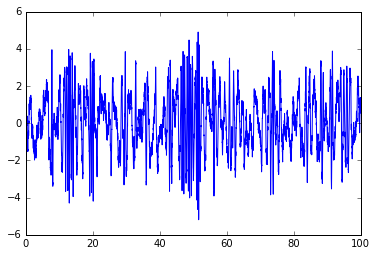

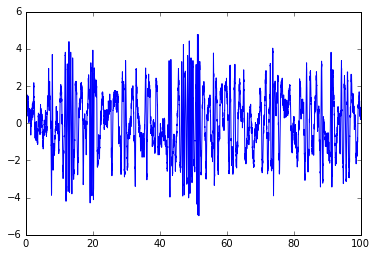

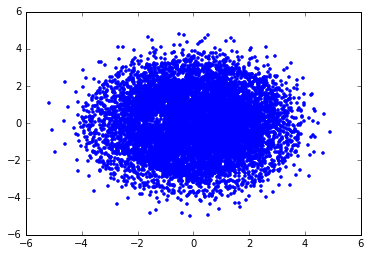

In [15]:
rand.seed(0)
t_max = 100.0
N = 10000
delta_t = t_max/N
T = np.linspace(0,t_max,N)
xv = np.zeros((len(T),2))
xv[0,0] = 1
xv[0,1] = 1
for i in range(N-1):
    xv[i+1] = couple_step_forward(xv[i,0],xv[i,1],T[i],delta_t)
plt.plot(T,xv[:,0])
plt.show()
plt.plot(T,xv[:,1])
plt.show()
plt.plot(xv[:,0],xv[:,1],'.')
plt.show()